In [1]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [22]:
def osc(y_v,t,omega=1):#y_v son las variables y,v
    dy,dv=y_v[1],-omega*y_v[0]-0.01*y_v[1]+0.5*sin(2*t)
    return array([dy,dv])

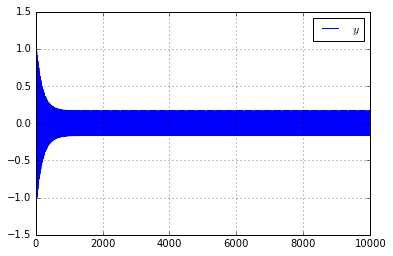

In [24]:
t=linspace(0,10000,10000)
ini=array([0.1,0.8])
sol=odeint(osc,ini,t)
plot(t,sol[:,0],label="$y$")
#plot(t,sol[:,1],label="$v_y$")
legend()
grid(True)
show()

In [4]:
ind=10
ti,pto_i=t[ind],sol[ind]
err=1e-5
while abs(pto_i[0])>err:
    tip1=ti-(pto_i[0]/pto_i[1])
    paso=odeint(osc,pto_i,[ti,tip1])
    ti,pto_i=tip1,paso[-1]
print ti,pto_i

-5.90651376778e-09 [ -9.44439682e-11   9.99999947e-01]


In [13]:
def buscaraiz(func,pto_i,ti,err=1e-5):
    while abs(pto_i[0])>err:
        tip1=ti-(pto_i[0]/pto_i[1])
        paso=odeint(func,pto_i,[ti,tip1])
        ti,pto_i=tip1,paso[-1]
    return ti,pto_i

In [25]:
num=len(t)
raices=zeros(num)
ptos=zeros((num,2))
j=0
for i in range(len(t)-1):
    if (sol[i][0]*sol[i+1][0])<0:
        raices[j],ptos[j]=buscaraiz(osc,sol[i],t[i])
        j+=1
raices,ptos=raices[0:j],ptos[0:j]
#print raices,ptos
    
    
    
#ti,pto_i=t[ind],sol[ind]
#t_raiz,punto=buscaraiz(osc,pto_i,ti)
#print t_raiz,punto

/home/adriana/anaconda2/lib/python2.7/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


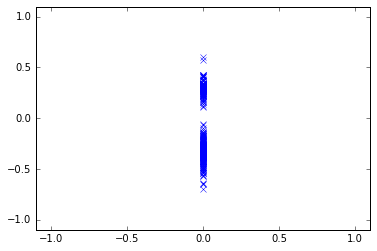

In [29]:
xlim([-1.1,1.1]),ylim([-1.1,1.1])
plot(ptos[100:,0],ptos[100:,1],'x')
show()

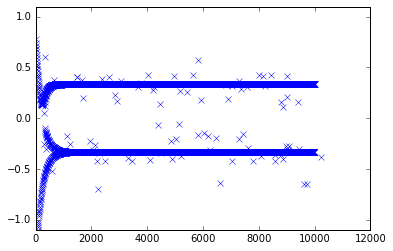

In [30]:
ylim([-1.1,1.1])
plot(raices,ptos[:,1],'x')
#asintotas de la grafica